<a href="https://colab.research.google.com/github/devyoungjin/ML/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN (Artificial Neural Networks)

- From Perceptron to MLP(ANN)

Perceptron: linear classifier define
percetron for h(Θ)-강의에서는 최적화에서 썼음 or h(w)- 인공신경망에서 썻음 (같은 파라미터)

sign function: +1, -1  
step function: 음수일때는0, 양수일때는 1


하나의 perceptron이 갖는 문제: XOR Problem
- Not lineraly separable
- Limitation of perceptron

* single perceptron = one linear classification boundary

Artificial Neural Network: MLP
- Multi Layer Perceptron = ANN

Activation Function
- Differentiable  nonlinear activation function

Before: sign&step:  non diff(미분 불가:비연속점이 있으니까)

After: Sigmoid(미분가능하도록)

Common Activation Function (연속가능=(미분가능))
- Sigmoid function =tf.nn.sigmoid(z)
- Hyperbolic Tangent = tf.nn.tanh(z)
- Rectified Liner Unit(ReLU) =tf.nn.relu(z)


A single layer is not enough to be able to represent complex relationship between input and output => perceptron with many layers and units

MLP:
- features of feature
- mapping of mappings

Another Perspective: ANN as Kernel Learning

kennel=mapping => linear sperable 가능하도록 만듬

Nonlinear classification을 mapping(커널)을 통해서 liner sperable하게 만든다

kernel(	$\phi$): user define

kernel(2D->3D)

Kernel
- Often we  want to capture nonliner  patterns in the data
-- nonlinear regression: input and output relationship may not be linear
-- nonlinear classification: class may not be sperable by a linear boundary

- Linear  model(e.g. linear regression, linear SVM) are not just rich enough
-- by  mapping  data to higher dimensions where it exhibits linear patterns
-- apply the linear model in  the new input feature space
-- mapping: changing  the feature representation

- Kernels: make liner model work in nonlinear settings

Multi layer  perceptron
- Nonlinear mapping can be represented by another neurons
- we can generalize an MLP
(Kernel이 layer 가 되므로써 layer가 깊어짐)

* MLP에서는 classification뿐만 아니라 kernel까지도 찾는다(동시에)

$σ =  sigmoid$

tensorflow에서 bias를 전체 스트럭처에 표시하지 않는 이유: 몇개인지 알수 있어서(사이즈의 개수는 다음노드에 개수)


* one-hot encoding
: one-hot encoding is a conventional practice for a multi-class classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline


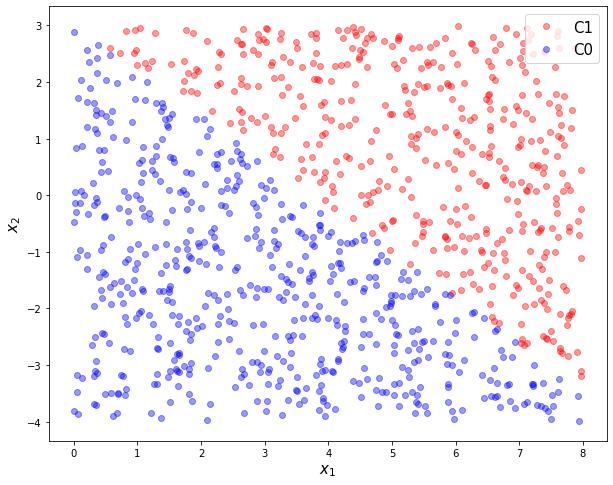

In [ ]:
#training data gerneration
m = 1000
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

plt.figure(figsize = (10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()


In [ ]:
LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2, 
                          units = 1, 
                          activation = 'sigmoid')
])

In [ ]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                           loss = 'binary_crossentropy')

In [ ]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 10)


Epoch 1/10
32/32 [==============================] - 1s 1ms/step - loss: 0.6451
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2516
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1665
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1476
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1342
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1232
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1134
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1078
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0999


In [ ]:
w = LogisticRegression.layers[0].get_weights()[0]
b = LogisticRegression.layers[0].get_weights()[1]
print(w)
print(b)

[[1.7951788]
 [2.3418267]]
[-6.716136]


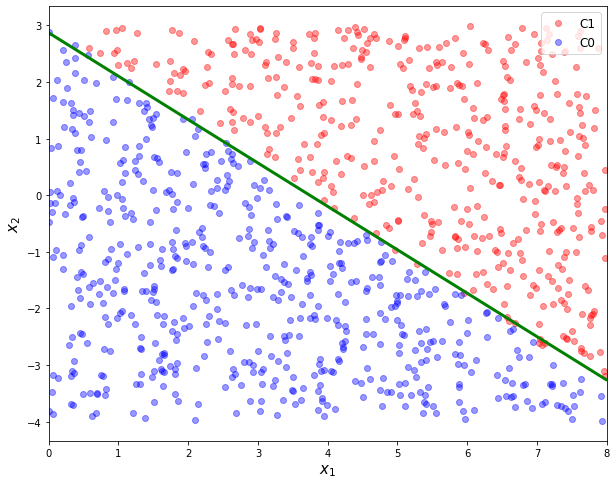

In [ ]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure(figsize = (10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [ ]:
LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2, units = 2, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                           loss = 'binary_crossentropy')

In [ ]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 10)


Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 0.5889
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3418
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2411
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1838
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1453
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1225
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1070
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0905


In [ ]:
w1 = LogisticRegression.layers[0].get_weights()[0]
b1 = LogisticRegression.layers[0].get_weights()[1]

w2 = LogisticRegression.layers[1].get_weights()[0]
b2 = LogisticRegression.layers[1].get_weights()[1]

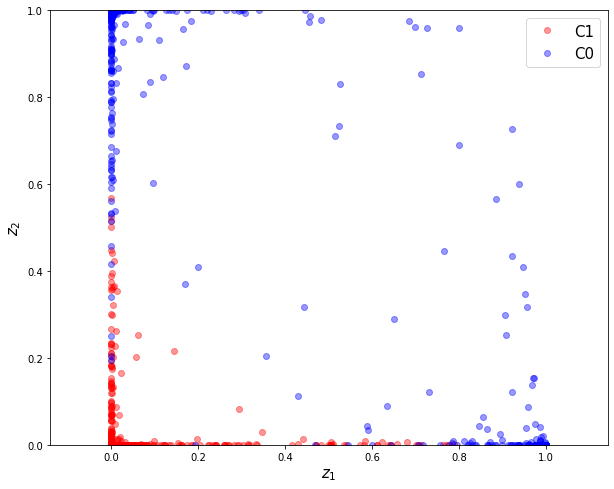

In [ ]:
H = train_X*w1 + b1
H = 1/(1 + np.exp(-H))

plt.figure(figsize = (10, 8))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

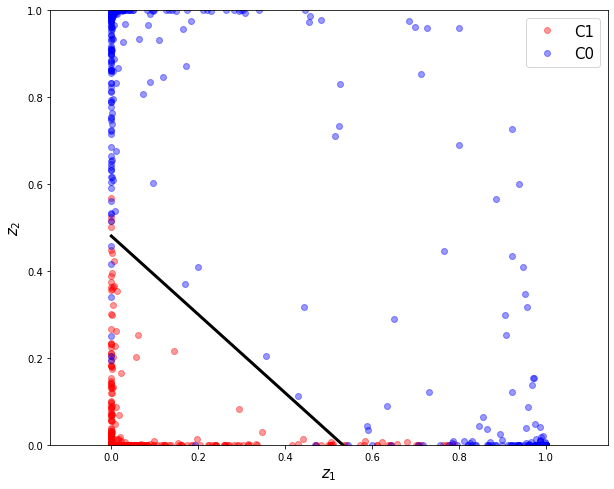

In [ ]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[1,0]*x1p - b2[0]/w2[1,0]

plt.figure(figsize = (10, 8))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

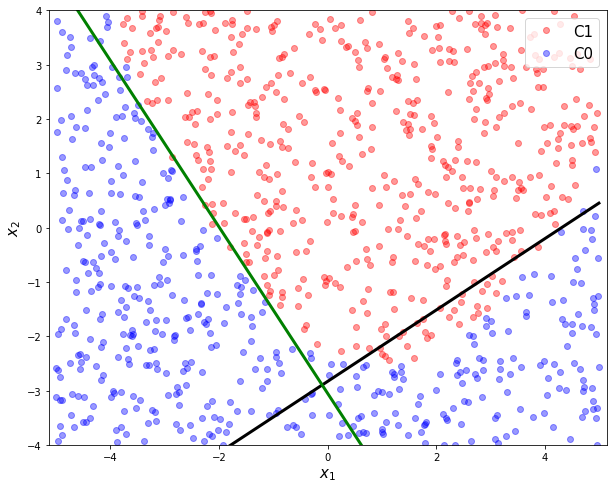

In [ ]:
x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w1[0,0]/w1[1,0]*x1p - b1[0]/w1[1,0]
x3p = - w1[0,1]/w1[1,1]*x1p - b1[1]/w1[1,1]

plt.figure(figsize = (10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

직선이 두개인 이유: 원핫 인코딩